In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Establish connection to the database
db_path = r"C:\Users\user\Desktop\3Signet Project2 Task\ABCPharmData.db"
conn = sql.connect(db_path)

In [4]:
# Load data into a DataFrame
query = "SELECT * FROM ABCData"
df = pd.read_sql(query, conn)
df.head()

,ID,Distributor,CustomerName,City,Country,Latitude,Longitude,Channel,Subchannel,ProductName,ProductClass,Quantity,Price,Sales,Month,Year,SalesRep,Manager,SalesTeam
0,1,Gottlieb-Cruickshank,"Zieme, Doyle and Kunze",Lublin,Poland,51.2333,22.5667,Hospital,Private,Topipizole,Mood Stabilizers,4.0,368,1472.0,January,2018,Mary Gerrard,Britanny Bold,Delta
1,2,Gottlieb-Cruickshank,Feest PLC,Świecie,Poland,53.4167,18.4333,Pharmacy,Retail,Choriotrisin,Antibiotics,7.0,591,4137.0,January,2018,Jessica Smith,Britanny Bold,Delta
2,3,Gottlieb-Cruickshank,Medhurst-Beer Pharmaceutical Limited,Rybnik,Poland,50.0833,18.5000,Pharmacy,Institution,Acantaine,Antibiotics,30.0,66,1980.0,January,2018,Steve Pepple,Tracy Banks,Bravo
3,4,Gottlieb-Cruickshank,Barton Ltd Pharma Plc,Czeladź,Poland,50.3333,19.0833,Hospital,Private,Lioletine Refliruvax,Analgesics,6.0,435,2610.0,January,2018,Mary Gerrard,Britanny Bold,Delta
4,5,Gottlieb-Cruickshank,Keeling LLC Pharmacy,Olsztyn,Poland,53.7800,20.4942,Pharmacy,Retail,Oxymotroban Fexoformin,Analgesics,20.0,458,9160.0,January,2018,Anne Wu,Britanny Bold,Delta


### Data Preprocessing and Validation

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254082 entries, 0 to 254081
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            254082 non-null  int64  
 1   Distributor   254082 non-null  object 
 2   CustomerName  254082 non-null  object 
 3   City          254082 non-null  object 
 4   Country       254082 non-null  object 
 5   Latitude      254082 non-null  float64
 6   Longitude     254082 non-null  float64
 7   Channel       254082 non-null  object 
 8   Subchannel    254082 non-null  object 
 9   ProductName   254082 non-null  object 
 10  ProductClass  254082 non-null  object 
 11  Quantity      254082 non-null  float64
 12  Price         254082 non-null  int64  
 13  Sales         254082 non-null  float64
 14  Month         254082 non-null  object 
 15  Year          254082 non-null  int64  
 16  SalesRep      254082 non-null  object 
 17  Manager       254082 non-null  object 
 18  Sale

In [7]:
#Converting Quantity and Sales column to Integer type

df['Quantity'] = df['Quantity'].astype(int)
df['Sales'] = df['Sales'].astype(int)
print(df.dtypes)

ID                int64
Distributor      object
CustomerName     object
City             object
Country          object
Latitude        float64
Longitude       float64
Channel          object
Subchannel       object
ProductName      object
ProductClass     object
Quantity          int32
Price             int64
Sales             int32
Month            object
Year              int64
SalesRep         object
Manager          object
SalesTeam        object
dtype: object


In [8]:
# Converting the 'Month' column to numeric format
df['Month'] = pd.to_datetime(df['Month'], format='%B').dt.month

In [11]:
print(sorted(df['Month'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [13]:
#Creating an object cursor to execute sql queries
cursor = conn.cursor()

In [17]:
#CHECKING FOR DUPLICATES IN INDEX
rowz= cursor.execute("SELECT* FROM ABCData GROUP BY ID HAVING COUNT(*) > 1").fetchall()
print(rowz)

[]


In [18]:
#Now we want to confirm there are no duplicate rows in data\n",
df_removed = df.copy()

In [19]:
 df_removed.drop(columns=["ID"])

,Distributor,CustomerName,City,Country,Latitude,Longitude,Channel,Subchannel,ProductName,ProductClass,Quantity,Price,Sales,Month,Year,SalesRep,Manager,SalesTeam
0,Gottlieb-Cruickshank,"Zieme, Doyle and Kunze",Lublin,Poland,51.2333,22.5667,Hospital,Private,Topipizole,Mood Stabilizers,4,368,1472,1,2018,Mary Gerrard,Britanny Bold,Delta
1,Gottlieb-Cruickshank,Feest PLC,Świecie,Poland,53.4167,18.4333,Pharmacy,Retail,Choriotrisin,Antibiotics,7,591,4137,1,2018,Jessica Smith,Britanny Bold,Delta
2,Gottlieb-Cruickshank,Medhurst-Beer Pharmaceutical Limited,Rybnik,Poland,50.0833,18.5000,Pharmacy,Institution,Acantaine,Antibiotics,30,66,1980,1,2018,Steve Pepple,Tracy Banks,Bravo
3,Gottlieb-Cruickshank,Barton Ltd Pharma Plc,Czeladź,Poland,50.3333,19.0833,Hospital,Private,Lioletine Refliruvax,Analgesics,6,435,2610,1,2018,Mary Gerrard,Britanny Bold,Delta
4,Gottlieb-Cruickshank,Keeling LLC Pharmacy,Olsztyn,Poland,53.7800,20.4942,Pharmacy,Retail,Oxymotroban Fexoformin,Analgesics,20,458,9160,1,2018,Anne Wu,Britanny Bold,Delta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254077,Bashirian-Kassulke,"Koch, Borer and Hagenes Pharmaceutical Ltd",Lauf,Germany,49.5103,11.2772,Hospital,Private,Pentastrin,Antibiotics,919,497,456743,12,2020,Thompson Crawford,James Goodwill,Alfa
254078,Bashirian-Kassulke,Hane Ltd Pharmaceutical Ltd,Aichach,Germany,48.4500,11.1333,Hospital,Private,Abranatal Lysoprosate,Antiseptics,432,681,294192,12,2020,Anne Wu,Britanny Bold,Delta
254079,Bashirian-Kassulke,Harris-Conroy Pharmacy,Wilhelmshaven,Germany,53.5167,8.1333,Pharmacy,Retail,Adideine,Mood Stabilizers,320,678,216960,12,2020,Abigail Thompson,Tracy Banks,Bravo
254080,Bashirian-Kassulke,Balistreri Group Pharm,Böblingen,Germany,48.6833,9.0000,Hospital,Government,Feruprazole,Mood Stabilizers,565,115,64975,12,2020,Stella Given,Alisha Cordwell,Charlie


In [21]:
# Check for duplicate rows
duplicates = df_removed.duplicated()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.sum()}")

# If there are duplicates, show them
if duplicates.any():
    print("Duplicate rows:")
    print(df_removed[duplicates])
else:
    print("No duplicate rows found.")


Number of duplicate rows: 0
No duplicate rows found.


In [27]:
%load_ext nb_black
# Checking for negative sales amounts\n",
invalid_sales = df[df["Sales"] < 0]
if not invalid_sales.empty:
    raise ValueError("Invalid sales amounts found.")

ValueError: Invalid sales amounts found.

<IPython.core.display.Javascript object>

In [28]:
# Checking how many rows have negative values in the Quantity or Sales column\n",
rowz = cursor.execute(
    "SELECT COUNT(*) AS NegativeCount FROM ABCData WHERE Quantity < 0 OR Sales < 0"
).fetchall()
print(rowz)

[(2633,)]


<IPython.core.display.Javascript object>

In [29]:
# Replacing negative values with their absolute values
df["Quantity"] = df["Quantity"].abs()
df["Sales"] = df["Sales"].abs()
print(df[df["Quantity"] < 0])

Empty DataFrame
Columns: [ID, Distributor, CustomerName, City, Country, Latitude, Longitude, Channel, Subchannel, ProductName, ProductClass, Quantity, Price, Sales, Month, Year, SalesRep, Manager, SalesTeam]
Index: []


<IPython.core.display.Javascript object>

In [30]:
rowz = cursor.execute(
    "SELECT COUNT(*) AS NegativeCount FROM ABCData WHERE Quantity = 0 OR Sales = 0"
).fetchall()
print(rowz)

[(27,)]


<IPython.core.display.Javascript object>

In [31]:
# Remove rows where 'Quantity' or 'Sales' have zero values
df_removed = df_removed[(df_removed['Quantity'] != 0) & (df_removed['Sales'] != 0)]

# Verify the changes
print(f"Number of rows after removal: {len(df_removed)}")


Number of rows after removal: 254054


<IPython.core.display.Javascript object>

In [32]:
print(df.isnull().sum())

ID              0
Distributor     0
CustomerName    0
City            0
Country         0
Latitude        0
Longitude       0
Channel         0
Subchannel      0
ProductName     0
ProductClass    0
Quantity        0
Price           0
Sales           0
Month           0
Year            0
SalesRep        0
Manager         0
SalesTeam       0
dtype: int64


<IPython.core.display.Javascript object>

# Performing EDA

In [33]:
# Check unique values in categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")


Distributor: 29 unique values
CustomerName: 751 unique values
City: 749 unique values
Country: 2 unique values
Channel: 2 unique values
Subchannel: 4 unique values
ProductName: 240 unique values
ProductClass: 6 unique values
SalesRep: 13 unique values
Manager: 4 unique values
SalesTeam: 4 unique values


<IPython.core.display.Javascript object>

In [34]:
# Getting summary statistics for numeric columns\n",
df.describe()

,ID,Latitude,Longitude,Quantity,Price,Sales,Month,Year
count,254082.000000,254082.000000,254082.000000,254082.000000,254082.000000,2.540820e+05,254082.000000,254082.000000
mean,127041.500000,50.962222,10.803212,115.685641,412.207720,4.759073e+04,6.548992,2018.385187
std,73347.299886,1.625526,4.143311,743.878255,224.963687,3.490366e+05,3.392253,1.041352
min,1.000000,47.514200,6.083800,0.000000,22.000000,0.000000e+00,1.000000,2017.000000
25%,63521.250000,49.805600,7.891100,5.000000,195.000000,1.800000e+03,4.000000,2018.000000
50%,127041.500000,51.133300,9.397800,20.000000,430.000000,6.040000e+03,7.000000,2018.000000
75%,190561.750000,52.083300,12.133300,50.000000,605.000000,2.225000e+04,10.000000,2019.000000
max,254082.000000,54.781900,23.566700,117600.000000,794.000000,7.420560e+07,12.000000,2020.000000


<IPython.core.display.Javascript object>

## Univariate Analysis of Variables 

### Observation on Distributor

In [36]:
# Let us define a function that allows for a Boxplot+Histogram chart of each variable
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

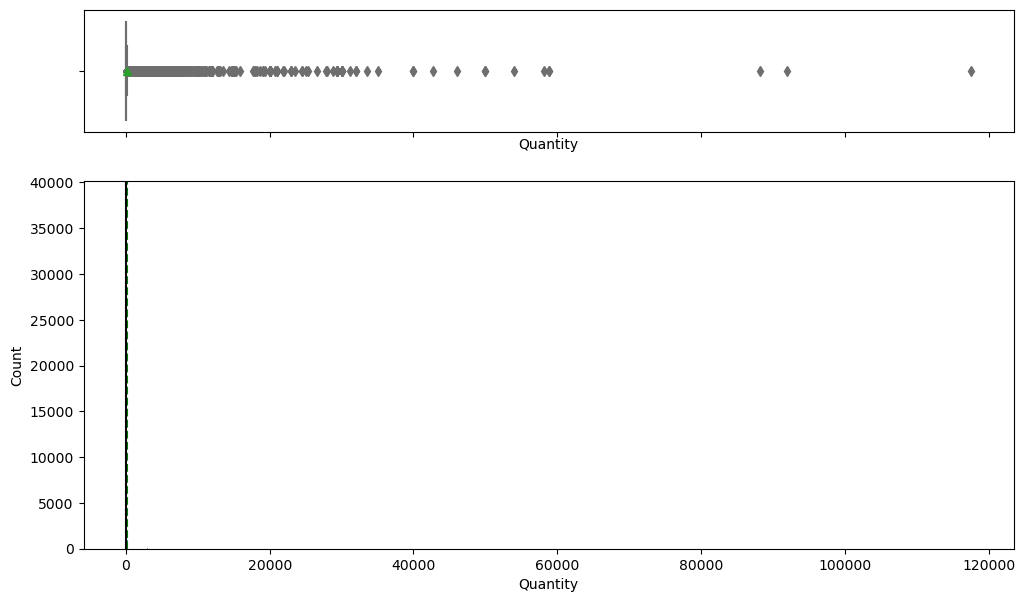

<IPython.core.display.Javascript object>

In [37]:
histogram_boxplot(df, "Quantity")

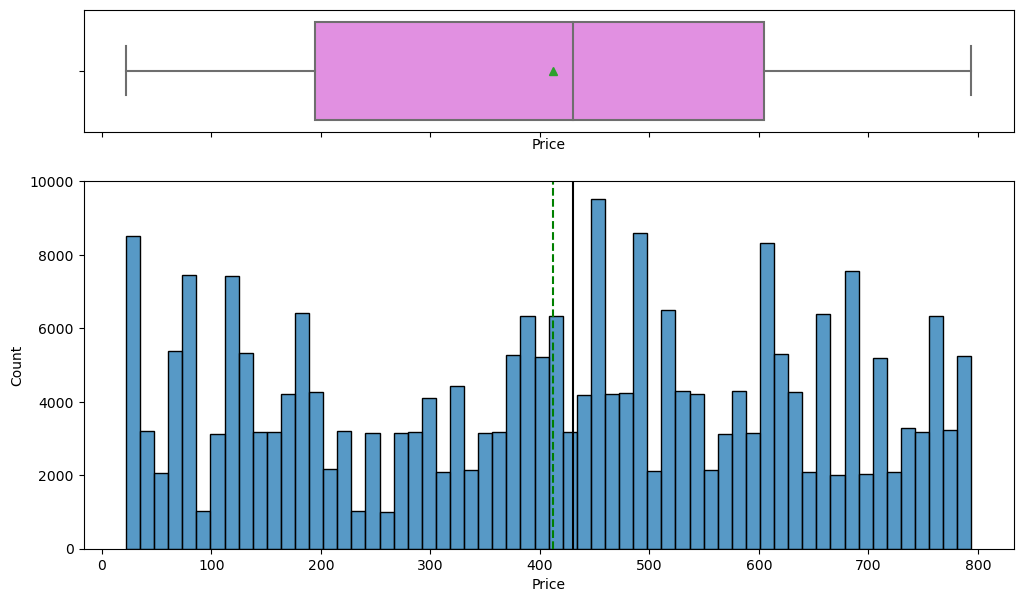

<IPython.core.display.Javascript object>

In [39]:
histogram_boxplot(df, "Price")

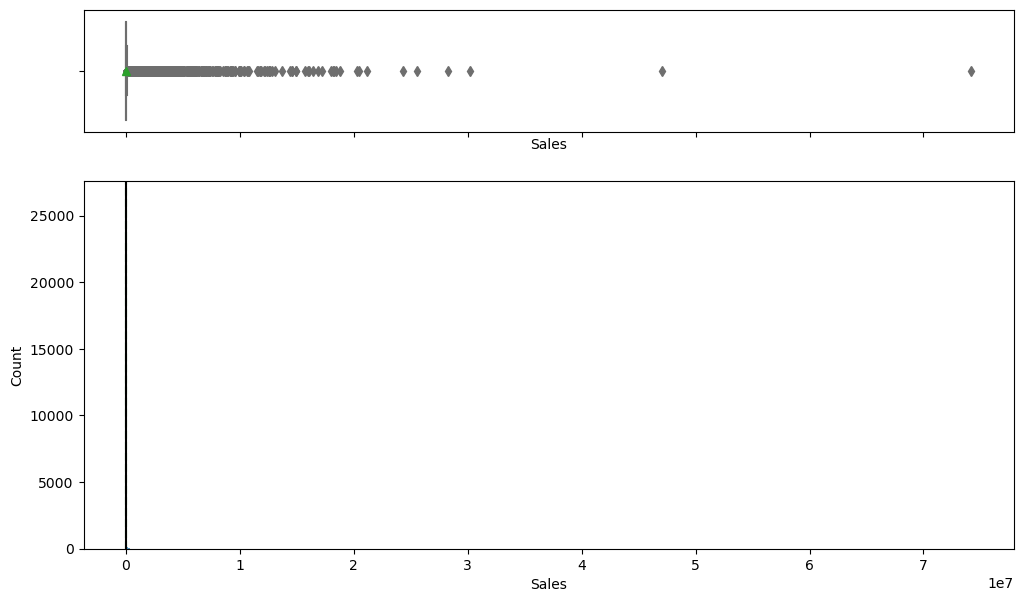

<IPython.core.display.Javascript object>

In [41]:
histogram_boxplot(df, "Sales")

### Lets us create a subset of the data that excludes extreme outliers so as to visulaize the quantity and sales column 

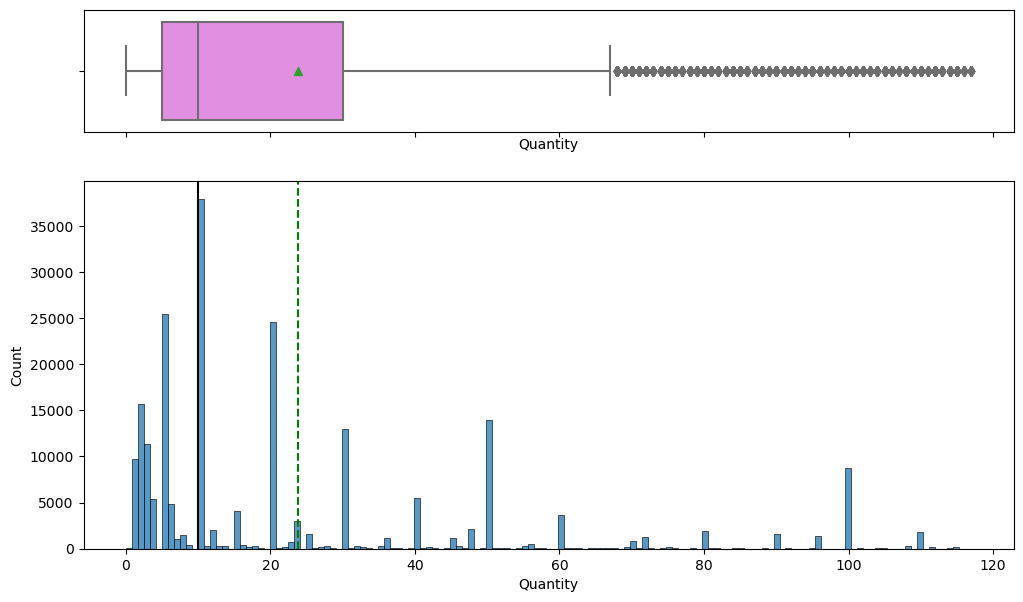

<IPython.core.display.Javascript object>

In [42]:
# Calculate IQR bounds
Q1 = df["Quantity"].quantile(0.25)  # First quartile (25th percentile)
Q3 = df["Quantity"].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df["Quantity"] >= lower_bound) & (df["Quantity"] <= upper_bound)]
# Plot histogram and boxplot for data without outliers\n",
histogram_boxplot(df_no_outliers, feature="Quantity", figsize=(12, 7))

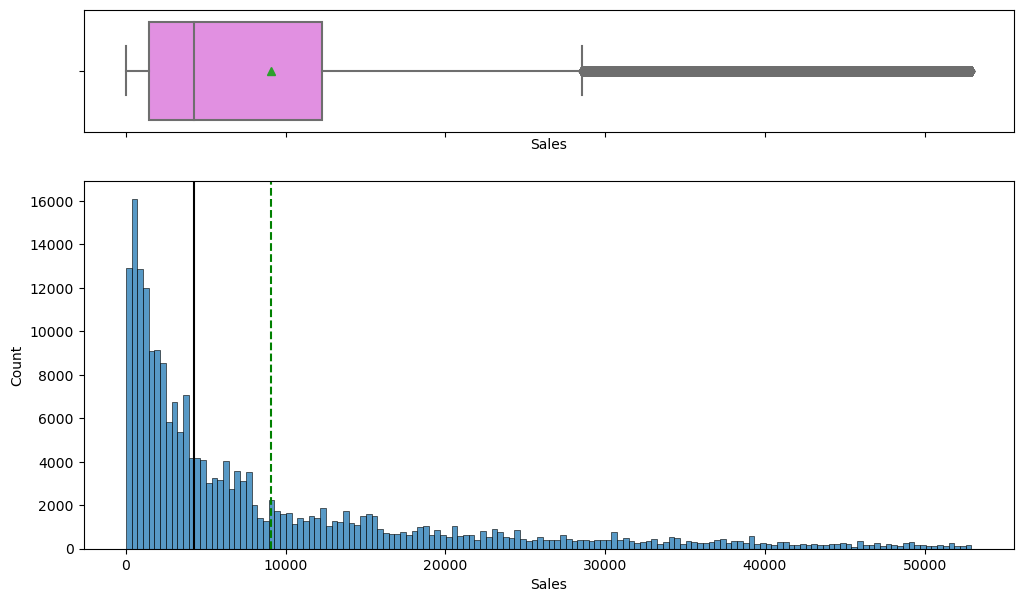

<IPython.core.display.Javascript object>

In [43]:
# Calculate IQR bounds
Q1 = df["Sales"].quantile(0.25)  # First quartile (25th percentile)
Q3 = df["Sales"].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers\n",
df_no_outliers = df[(df["Sales"] >= lower_bound) & (df["Sales"] <= upper_bound)]

# Plot histogram and boxplot for data without outliers
histogram_boxplot(df_no_outliers, feature="Sales", figsize=(12, 7))

In [56]:
# function to create labeled barplots
%matplotlib inline


def labeled_barplot(data, feature, perc=False, n=None):
    """
 Barplot with percentage at the top

 data: dataframe
 feature: dataframe column
 perc: whether to display percentages instead of count (default is False)
 n: displays the top n category levels (default is None, i.e., display all levels)
 """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()

    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category
        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

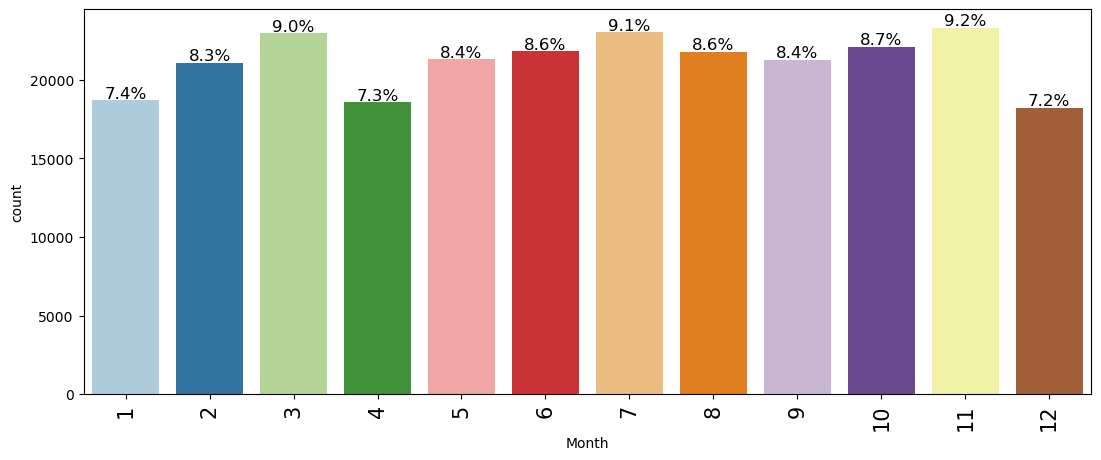

ERROR:root:Cannot parse: 51:0:       plt.show()  # show the plot
Traceback (most recent call last):
  File "c:\users\user\anaconda3\lib\site-packages\lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "c:\users\user\anaconda3\lib\site-packages\lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "c:\users\user\anaconda3\lib\site-packages\black.py", line 725, in format_str
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "c:\users\user\anaconda3\lib\site-packages\black.py", line 836, in lib2to3_parse
    raise exc from None
black.InvalidInput: Cannot parse: 51:0:       plt.show()  # show the plot


In [57]:
labeled_barplot(df, "Month", perc=True)

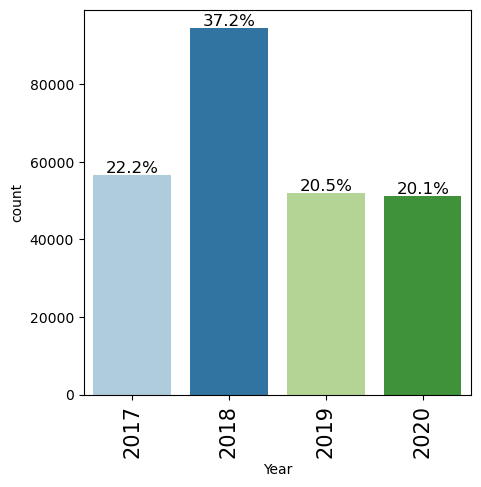

<IPython.core.display.Javascript object>

In [58]:
labeled_barplot(df, "Year", perc=True)

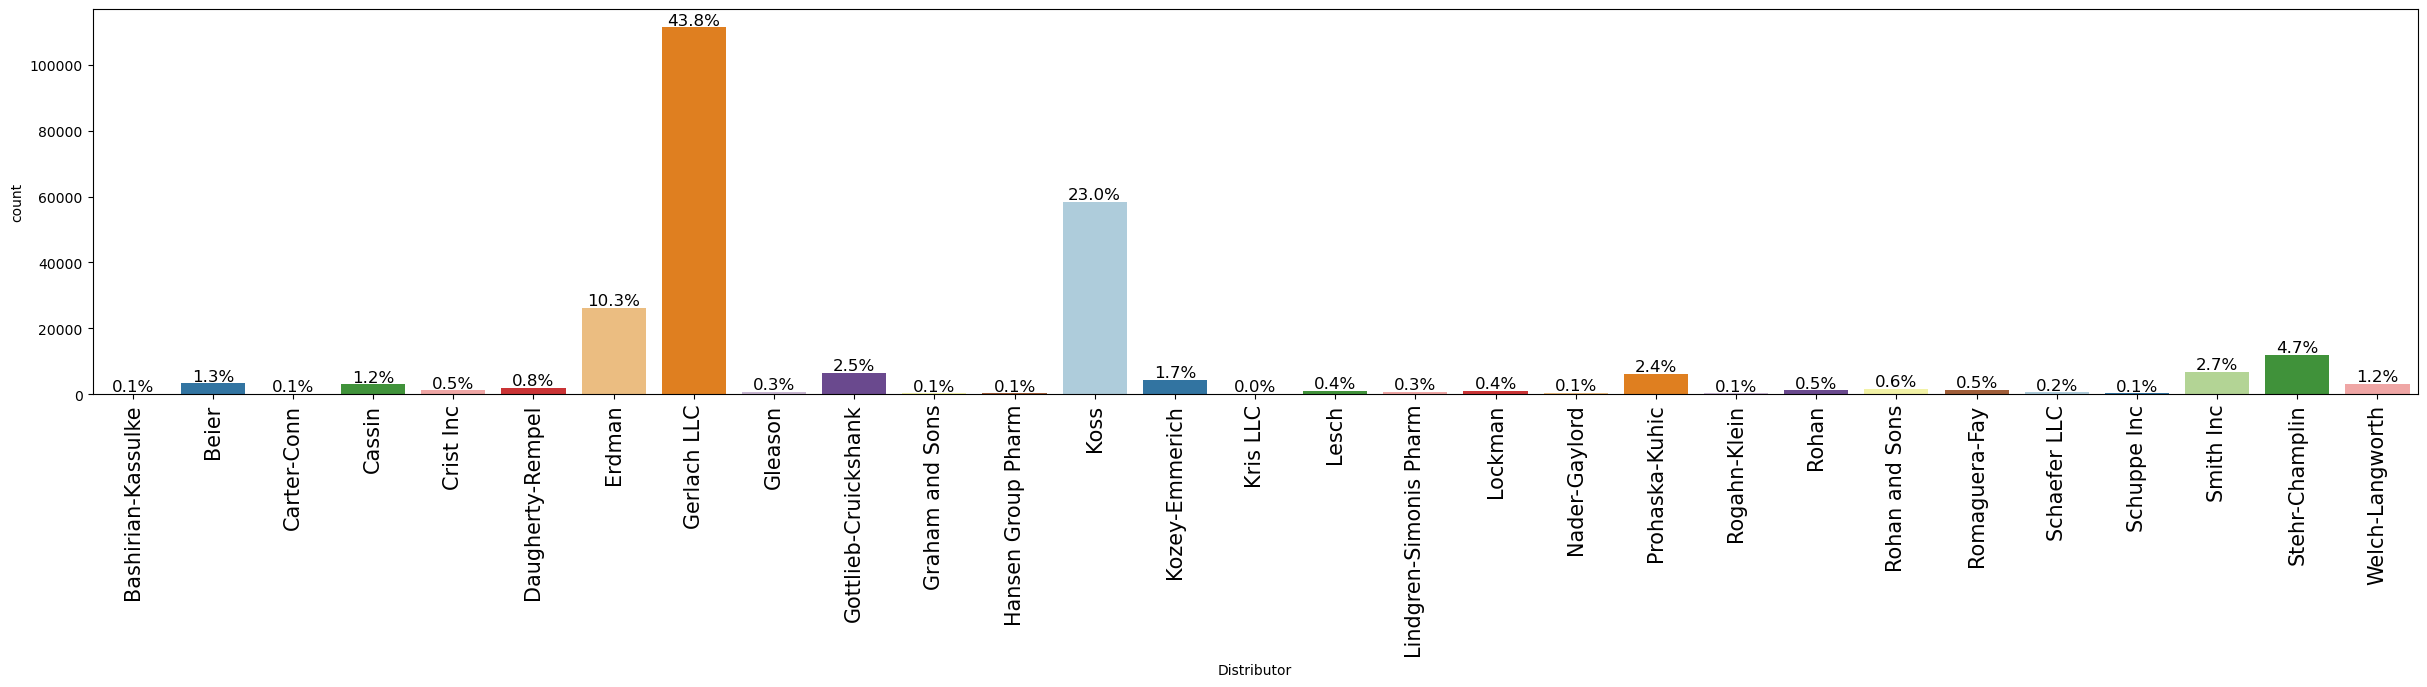

<IPython.core.display.Javascript object>

In [59]:
labeled_barplot(df, "Distributor", perc=True)

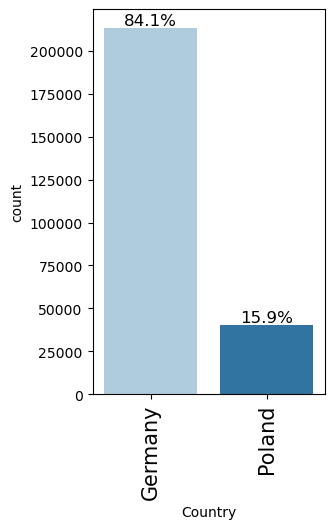

<IPython.core.display.Javascript object>

In [60]:
labeled_barplot(df, "Country", perc=True)

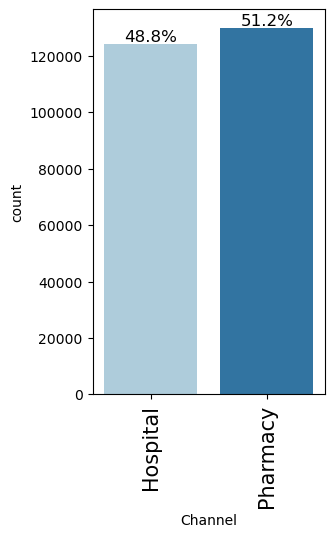

<IPython.core.display.Javascript object>

In [61]:
labeled_barplot(df, "Channel", perc=True)

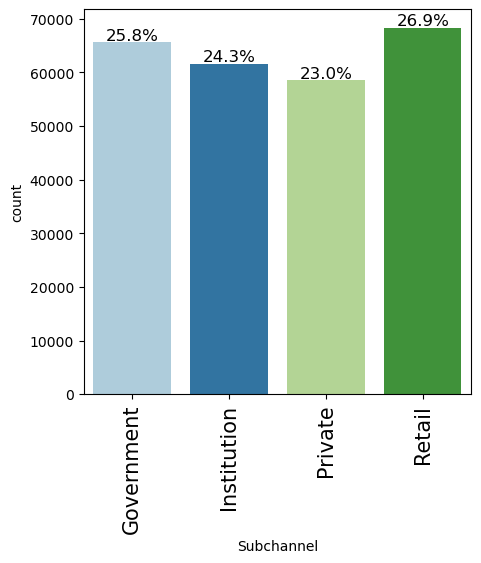

<IPython.core.display.Javascript object>

In [62]:
labeled_barplot(df, "Subchannel", perc=True)

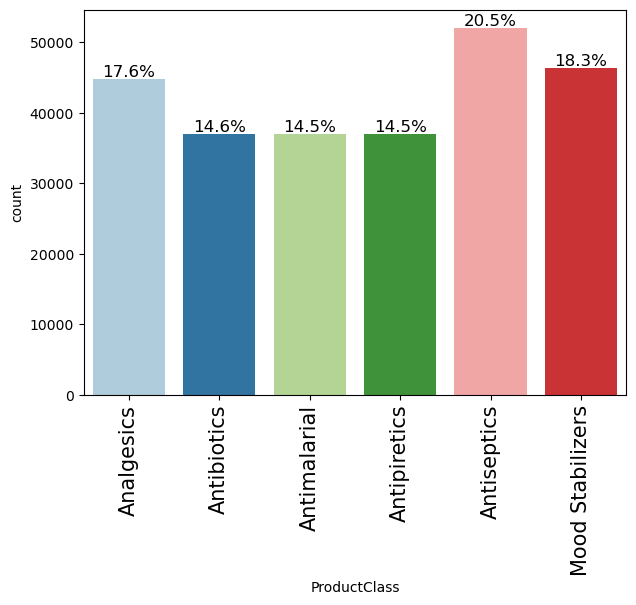

<IPython.core.display.Javascript object>

In [63]:
labeled_barplot(df, "ProductClass", perc=True)

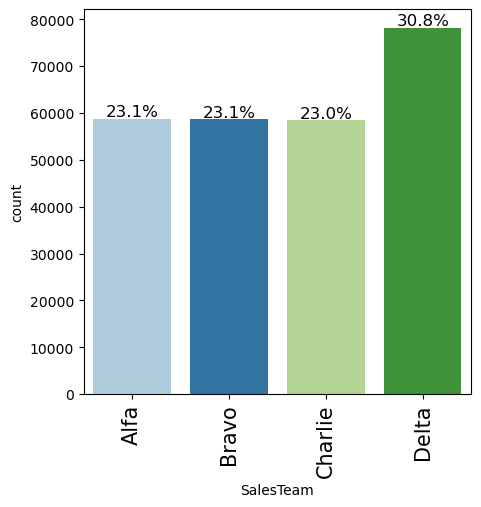

<IPython.core.display.Javascript object>

In [64]:
labeled_barplot(df, "SalesTeam", perc=True)

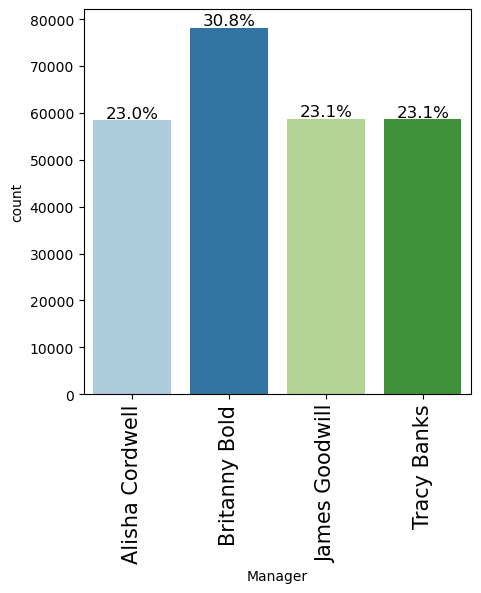

<IPython.core.display.Javascript object>

In [65]:
labeled_barplot(df, "Manager", perc=True)

### Bivariate Analysis

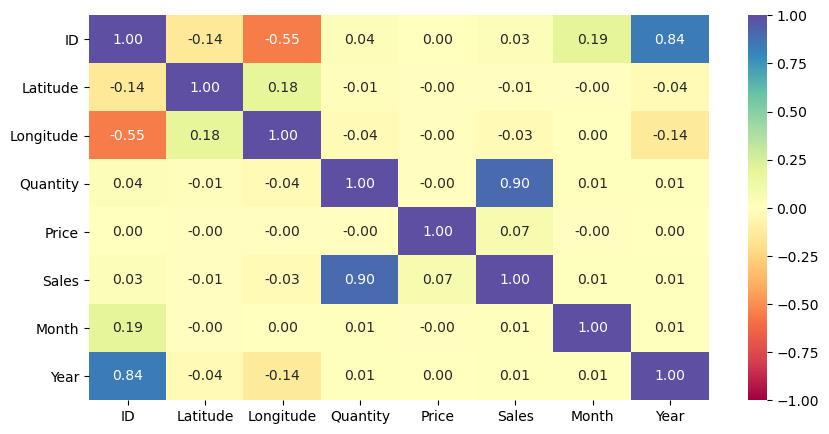

<IPython.core.display.Javascript object>

In [69]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

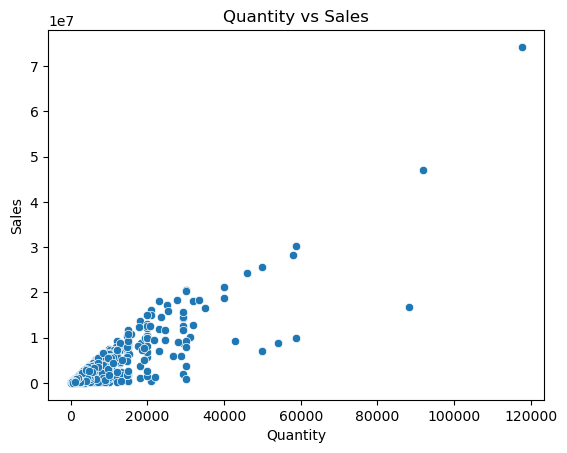

<IPython.core.display.Javascript object>

In [72]:
# Relationship between Quantity and Sales
sns.scatterplot(x="Quantity", y="Sales", data=df)
plt.title("Quantity vs Sales")
plt.show()

In [78]:
%matplotlib inline
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):

    """

    Print the category counts and plot a stacked bar chart
    
    data: dataframe
    predictor: independent variable
    target: target variable
     """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

ERROR:root:Cannot parse: 4:44: def stacked_barplot(data, predictor, target)
Traceback (most recent call last):
  File "c:\users\user\anaconda3\lib\site-packages\lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "c:\users\user\anaconda3\lib\site-packages\lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "c:\users\user\anaconda3\lib\site-packages\black.py", line 725, in format_str
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "c:\users\user\anaconda3\lib\site-packages\black.py", line 836, in lib2to3_parse
    raise exc from None
black.InvalidInput: Cannot parse: 4:44: def stacked_barplot(data, predictor, target)


In [79]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


ERROR:root:Cannot parse: 4:0:     def stacked_barplot(data, predictor, target)
Traceback (most recent call last):
  File "c:\users\user\anaconda3\lib\site-packages\lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "c:\users\user\anaconda3\lib\site-packages\lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "c:\users\user\anaconda3\lib\site-packages\black.py", line 725, in format_str
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "c:\users\user\anaconda3\lib\site-packages\black.py", line 836, in lib2to3_parse
    raise exc from None
black.InvalidInput: Cannot parse: 4:0:     def stacked_barplot(data, predictor, target)


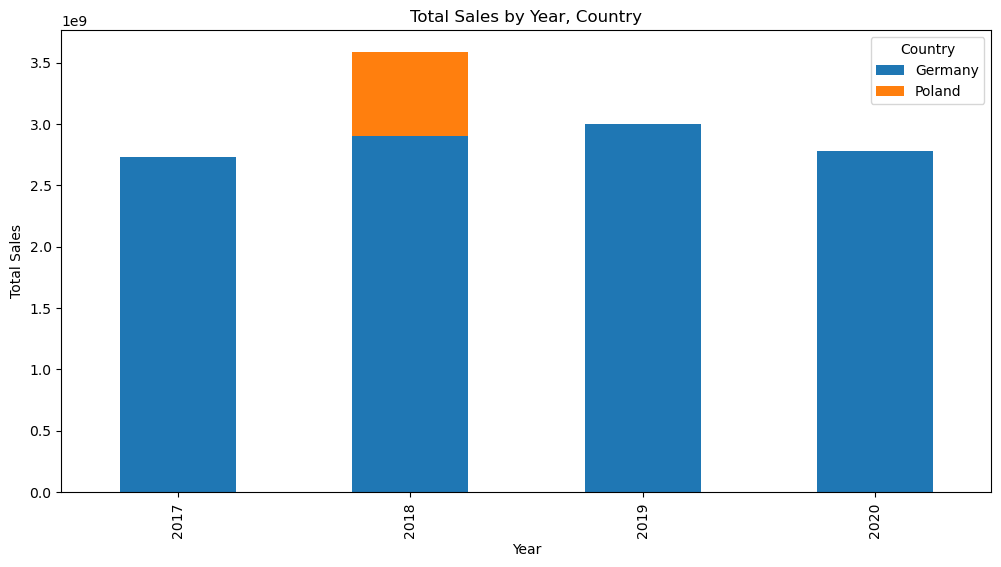

<IPython.core.display.Javascript object>

In [83]:
# Group data and create a bar chart\n",
sales_plot_data = df.groupby(["Year", "Country"])["Sales"].sum().reset_index()
sales_plot_data.pivot(index=["Year"], columns="Country", values="Sales").plot(
    kind="bar", stacked=True, figsize=(12, 6), title="Total Sales by Year, Country"
)

plt.ylabel("Total Sales")
plt.show()

PLS INCLUDE BARCHART FOR TOTAL SALES BY CHANNEL BEFORE PRESENTATION DAY

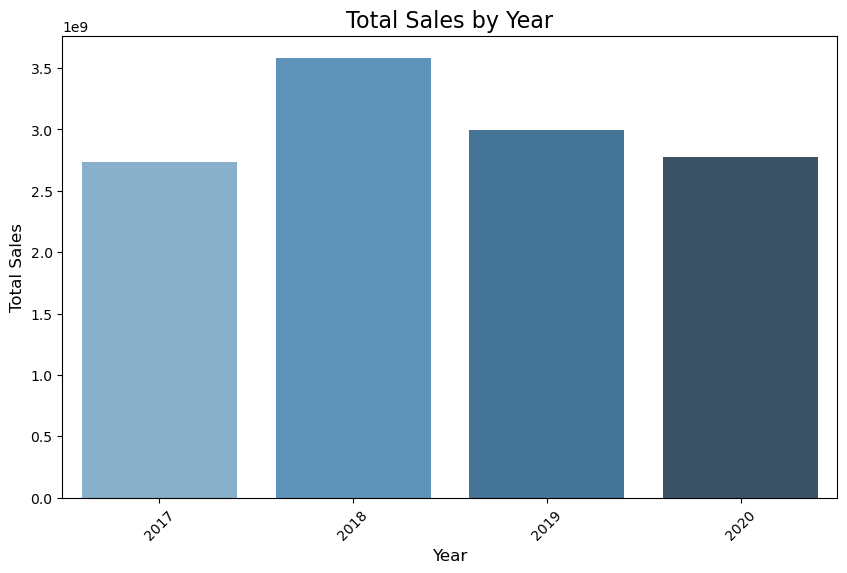

ERROR:root:Cannot parse: 2:0:     sales_plot_data = df.groupby(['Year', 'Country'])['Sales'].sum().reset_index()
Traceback (most recent call last):
  File "c:\users\user\anaconda3\lib\site-packages\lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "c:\users\user\anaconda3\lib\site-packages\lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "c:\users\user\anaconda3\lib\site-packages\black.py", line 725, in format_str
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "c:\users\user\anaconda3\lib\site-packages\black.py", line 836, in lib2to3_parse
    raise exc from None
black.InvalidInput: Cannot parse: 2:0:     sales_plot_data = df.groupby(['Year', 'Country'])['Sales'].sum().reset_index()


In [84]:
# Total sales by year\n",
yearly_sales = df.groupby("Year")["Sales"].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x="Year", y="Sales", data=yearly_sales, palette="Blues_d")
plt.title("Total Sales by Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)
plt.show()

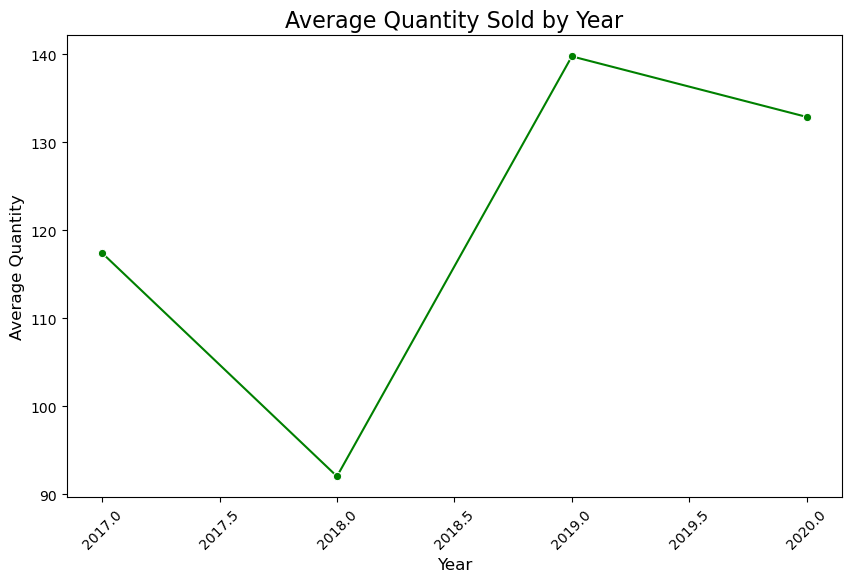

ERROR:root:Cannot parse: 4:9:     kind='bar
Traceback (most recent call last):
  File "c:\users\user\anaconda3\lib\site-packages\lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "c:\users\user\anaconda3\lib\site-packages\lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "c:\users\user\anaconda3\lib\site-packages\black.py", line 725, in format_str
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "c:\users\user\anaconda3\lib\site-packages\black.py", line 836, in lib2to3_parse
    raise exc from None
black.InvalidInput: Cannot parse: 4:9:     kind='bar


In [85]:
# Average quantity by year\n",
yearly_quantity = df.groupby("Year")["Quantity"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="Quantity", data=yearly_quantity, marker="o", color="green")
plt.title("Average Quantity Sold by Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Quantity", fontsize=12)
plt.xticks(rotation=45)
plt.show()

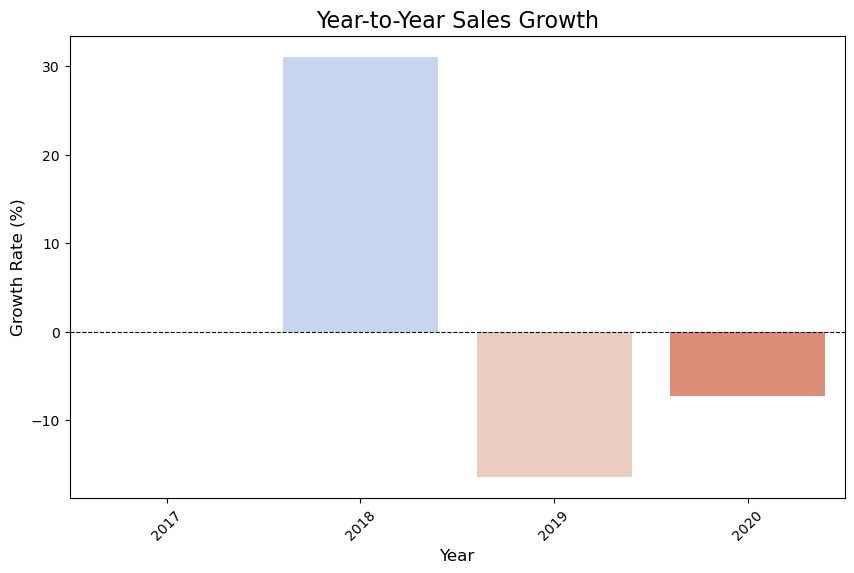

<IPython.core.display.Javascript object>

In [87]:
# Calculate yearly growth\n",
yearly_sales["YearlyGrowth"] = yearly_sales["Sales"].pct_change() * 100

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Year", y="YearlyGrowth", data=yearly_sales, palette="coolwarm")
plt.title("Year-to-Year Sales Growth", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Growth Rate (%)", fontsize=12)
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.xticks(rotation=45)
plt.show()

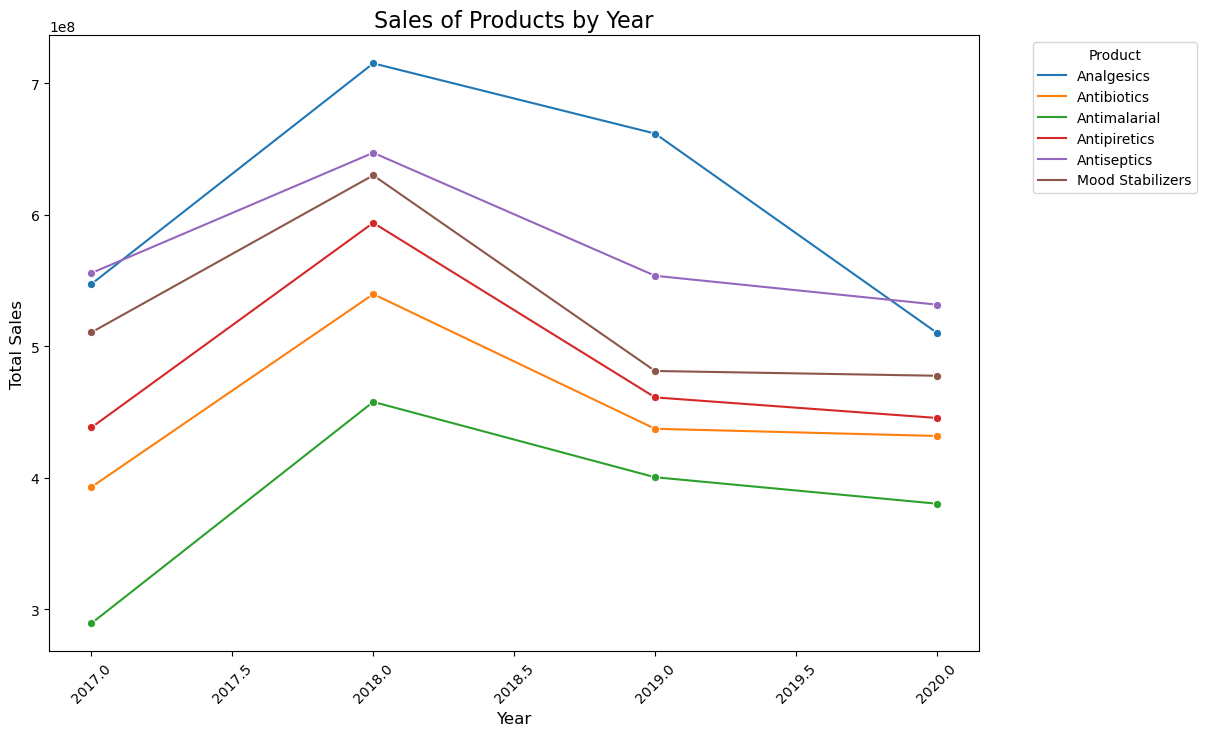

<IPython.core.display.Javascript object>

In [89]:
# Sales by product and year\n",
product_yearly_sales = df.groupby(["Year", "ProductClass"])["Sales"].sum().reset_index()

# Plot
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=product_yearly_sales, x="Year", y="Sales", hue="ProductClass", marker="o"
)
plt.title("Sales of Products by Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Product")
plt.xticks(rotation=45)
plt.show()

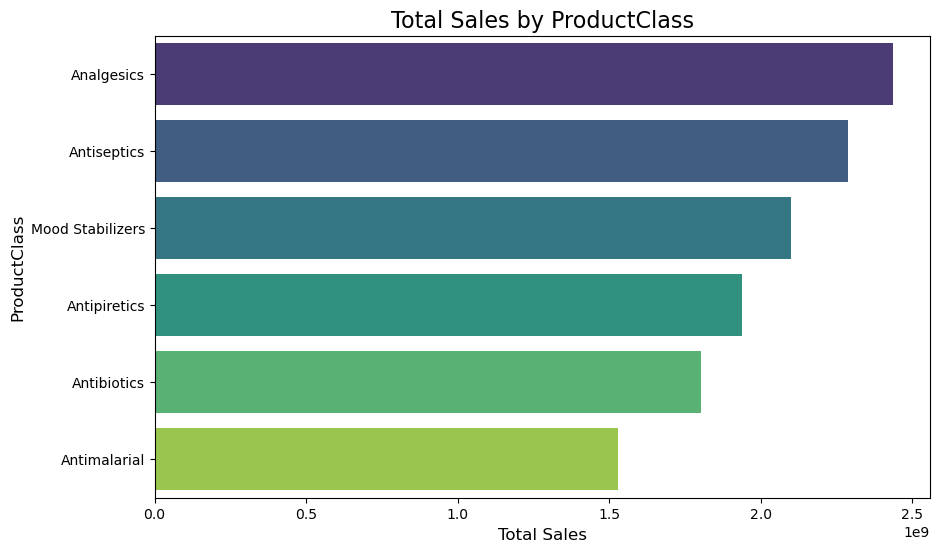

<IPython.core.display.Javascript object>

In [91]:
# Total sales by product clas
class_sales = (
    df.groupby("ProductClass")["Sales"]
    .sum()
    .reset_index()
    .sort_values(by="Sales", ascending=False)
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Sales", y="ProductClass", data=class_sales, palette="viridis")
plt.title("Total Sales by ProductClass", fontsize=16)
plt.xlabel("Total Sales", fontsize=12)
plt.ylabel("ProductClass", fontsize=12)
plt.show()

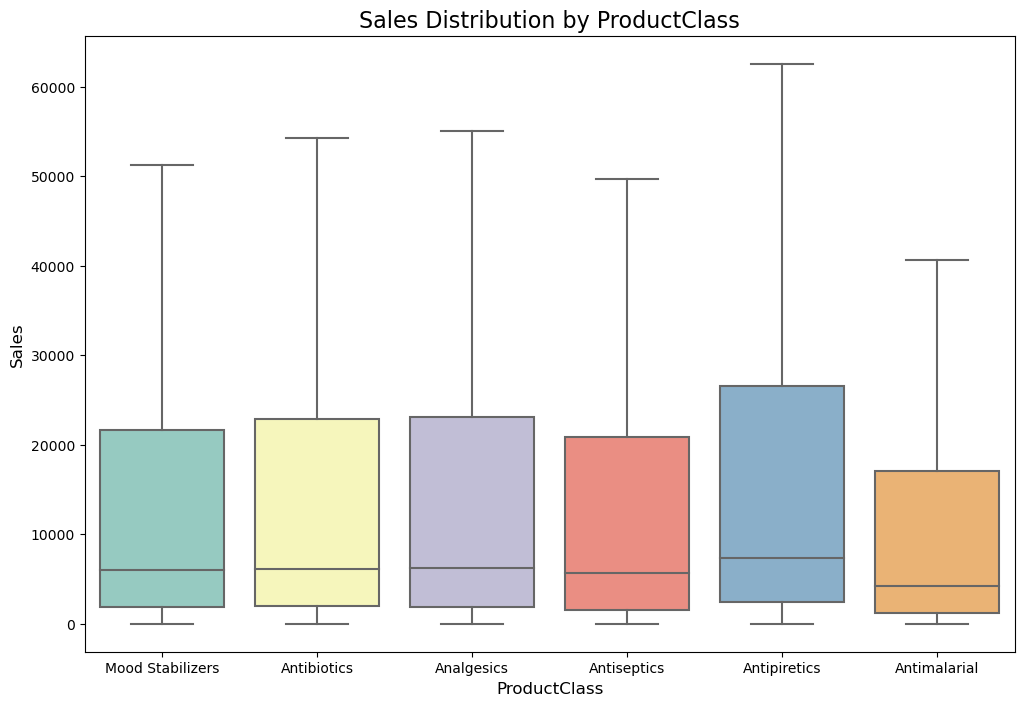

ERROR:root:Cannot parse: 2:0:     product_yearly_sales = df.groupby(['Year', 'ProductClass'])['Sales'].sum().reset_index()
Traceback (most recent call last):
  File "c:\users\user\anaconda3\lib\site-packages\lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "c:\users\user\anaconda3\lib\site-packages\lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "c:\users\user\anaconda3\lib\site-packages\black.py", line 725, in format_str
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "c:\users\user\anaconda3\lib\site-packages\black.py", line 836, in lib2to3_parse
    raise exc from None
black.InvalidInput: Cannot parse: 2:0:     product_yearly_sales = df.groupby(['Year', 'ProductClass'])['Sales'].sum().reset_index()


In [92]:
# Boxplot of sales distribution by product class
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="ProductClass", y="Sales", palette="Set3", showfliers=False)
plt.title("Sales Distribution by ProductClass", fontsize=16)
plt.xlabel("ProductClass", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.show()

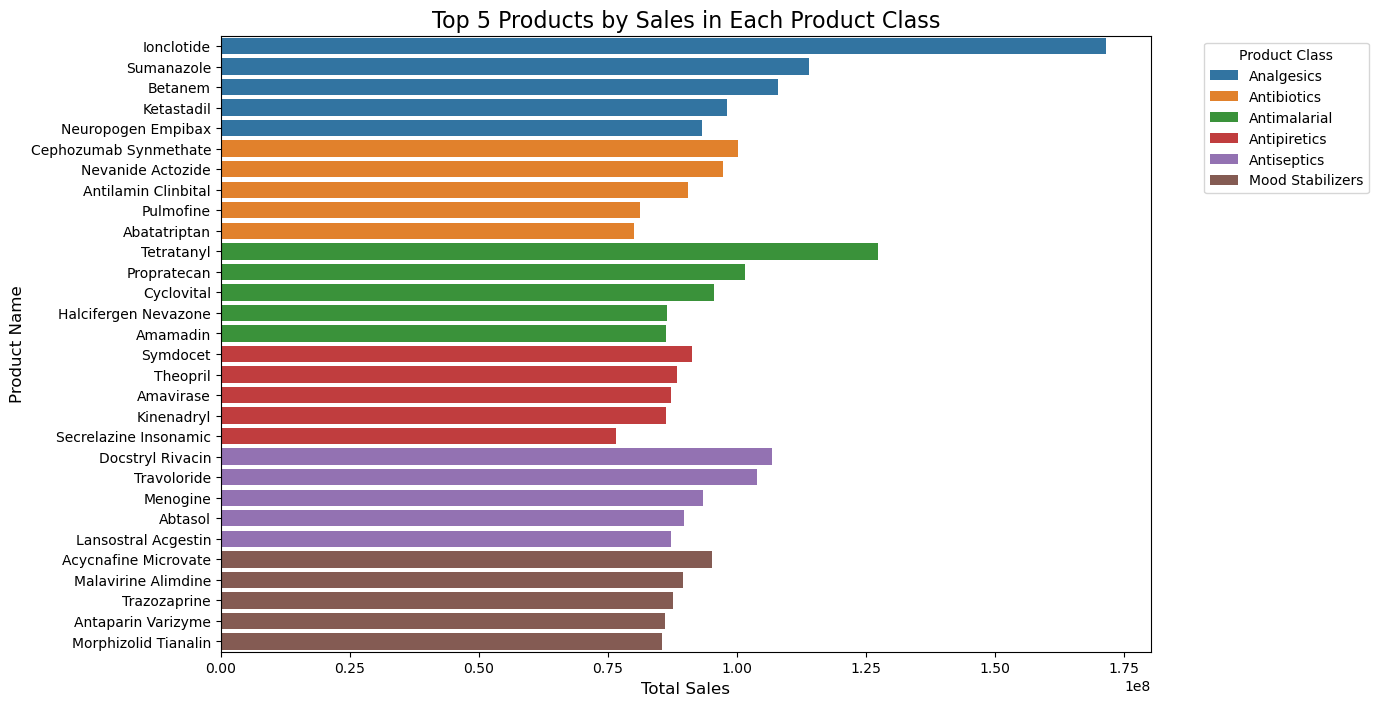

<IPython.core.display.Javascript object>

In [95]:
# Top 5 products per product class
top_5_per_class = (
    df.groupby(["ProductClass", "ProductName"])["Sales"].sum().reset_index()
)
top_5_per_class = top_5_per_class.sort_values(
    ["ProductClass", "Sales"], ascending=[True, False]
)

# Select the top 5 for each product class\n",
top_5_per_class = top_5_per_class.groupby("ProductClass").head(5)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_5_per_class,
    x="Sales",
    y="ProductName",
    hue="ProductClass",
    dodge=False,
    palette="tab10",
)
plt.title("Top 5 Products by Sales in Each Product Class", fontsize=16)
plt.xlabel("Total Sales", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.legend(title="Product Class", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

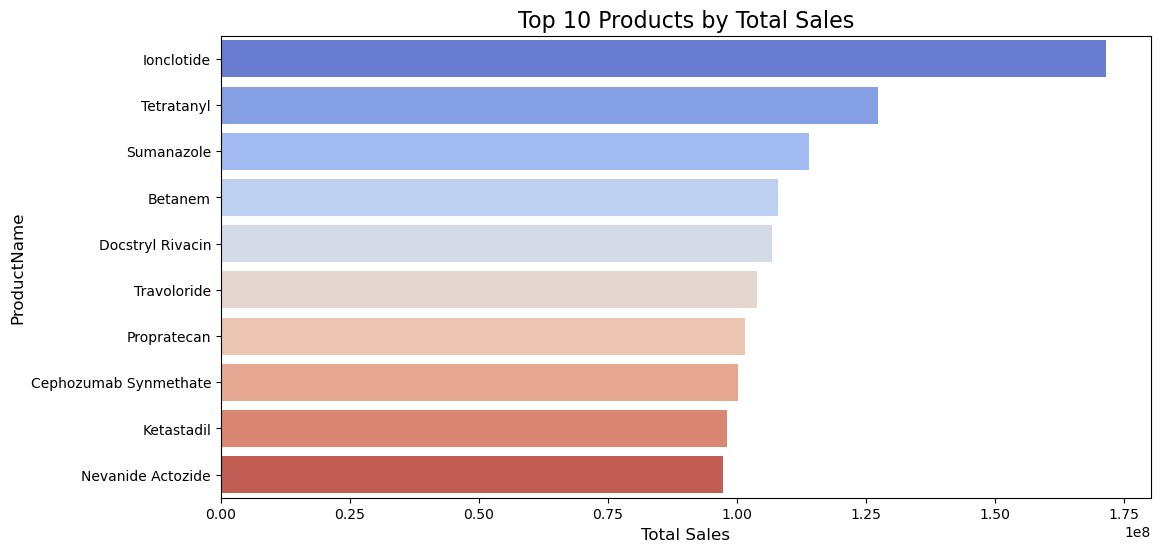

<IPython.core.display.Javascript object>

In [96]:
# Total sales by product name\n",
product_sales = df.groupby('ProductName')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

# Get the top 10 products
top_10_products = product_sales.head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='ProductName', data=top_10_products, palette='coolwarm')
plt.title('Top 10 Products by Total Sales', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('ProductName', fontsize=12)
plt.show()

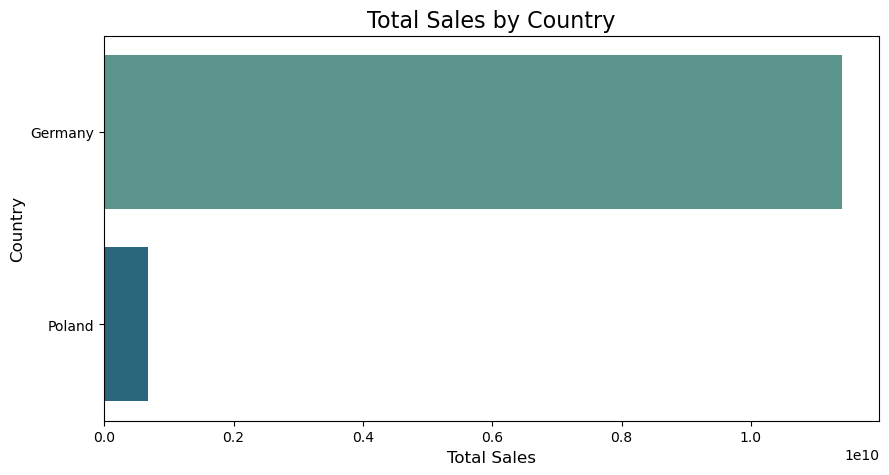

ERROR:root:Cannot parse: 2:90: top_5_per_class = df.groupby(['ProductClass', 'ProductName'])['Sales'].sum().reset_index()\n",
Traceback (most recent call last):
  File "c:\users\user\anaconda3\lib\site-packages\lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "c:\users\user\anaconda3\lib\site-packages\lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "c:\users\user\anaconda3\lib\site-packages\black.py", line 725, in format_str
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "c:\users\user\anaconda3\lib\site-packages\black.py", line 836, in lib2to3_parse
    raise exc from None
black.InvalidInput: Cannot parse: 2:90: top_5_per_class = df.groupby(['ProductClass', 'ProductName'])['Sales'].sum().reset_index()\n",


In [98]:
# Total sales by country
country_sales = df.groupby('Country')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=country_sales, x='Sales', y='Country', palette='crest')
plt.title('Total Sales by Country', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

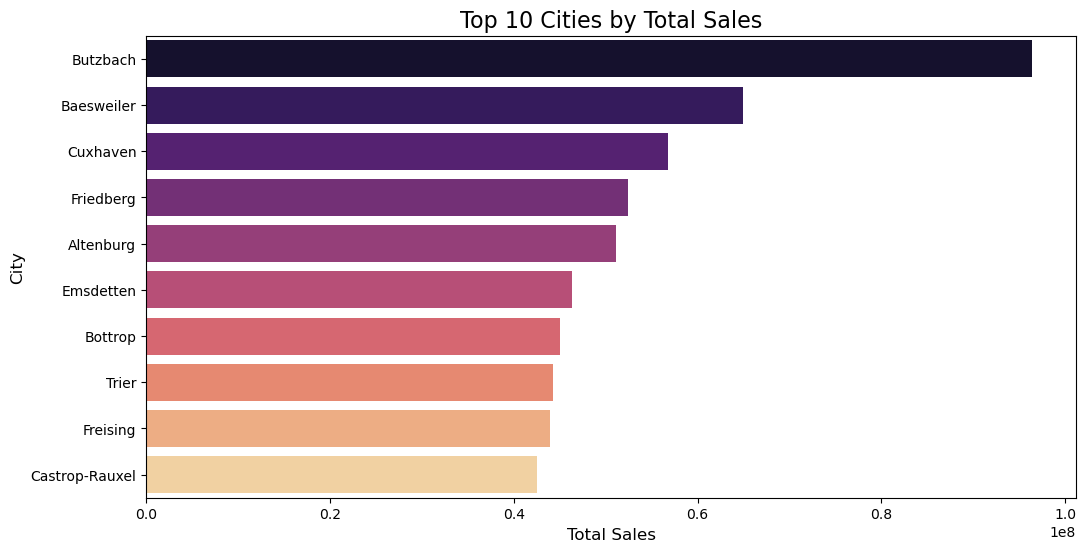

<IPython.core.display.Javascript object>

In [99]:
 # Total sales by city
city_sales = df.groupby('City')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

# Plot the top 10 cities
top_10_cities = city_sales.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_cities, x='Sales', y='City', palette='magma')
plt.title('Top 10 Cities by Total Sales', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()